M2780.002400 Machine Listening (Fall 2020)

Instructor: Kyogu Lee (kglee@snu.ac.kr)

# Assignment 3: Music Analysis

(80 points)

Due Date : This assignment is due by 12:59PM, September 29 (Tuesday)



---

Assignment

This assignment is composed of only one part: Lab assignment, you will need to write Notebook scripts and/or functions as required and submit them electronically (via **ETL**) by the end of the due date.

# Lab (80pts)

For all lab assignments, submit your Notebook file (.ipynb) and plots(.png) via **ETL**. The Notebook file should be named with your full name and the homework number – e.g., JohnDoe_hw2.ipynb. 

In addition to writing Python scripts and/or functions in your Notebook file, there are also questions you’ll have to answer. For such questions, you should provide answers in your Notebook file using Text sections.

**Please submit the codes executed (make sure that the results of your codes are visible in the submitted assignments) so that the grader can check whether the code is working or not.**

In [28]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import scipy.signal as signal



---


1.   Onset Detection (40 pts)
 
 Lab3 has onset detection algorithms that use the time-domain, frequency-domain, and phase-based features. 


*   a. Download T39-piano-8k.wav and T08-violin-8k.wav clips from the course homepage. Save onset detection results as image for each clip and each onset detection algorithms. The image should be named as INSTUMENT_#ofLAB_method.png, for example, a figure that uses a piano clip in lab4 should be titled piano_4_time_domain.png.


In [19]:
piano_path = './lab3/wav/T39-piano-8k.wav'
piano, sr = librosa.load(piano_path, sr=None)
ipd.Audio(piano, rate=sr_piano, autoplay=False)

In [20]:
violin_path = '../as_2/lab2/wav/T08-violin-8k.wav'
violin, sr = librosa.load(violin_path, sr=None)
ipd.Audio(violin, rate=sr_violin, autoplay=False)

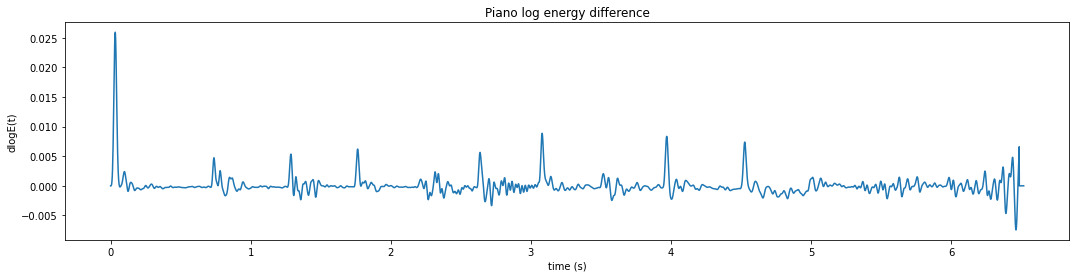

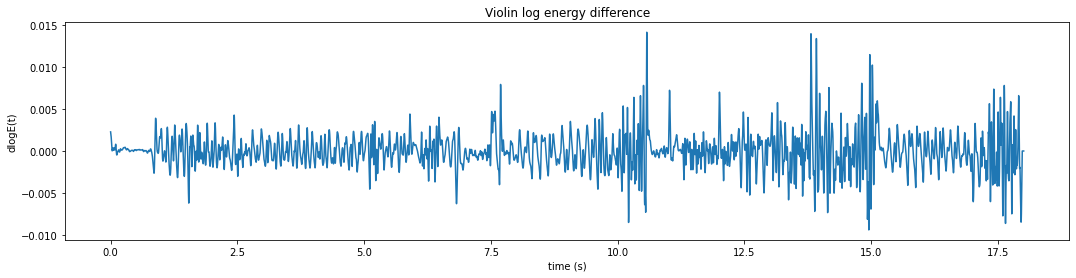

In [24]:
# Time Domain
M = 256
window = np.hamming(M)

# piano
e = np.zeros(len(piano)-M)
for i in range(0,len(piano)-M):
  e[i] = np.sum(np.square(np.multiply(piano[i:i+M],window)))/M
dloge = np.zeros(len(piano)-M)
diffloge = np.diff(np.log(e + 0.0000001))
for i in range(0,len(diffloge)-M):
  dloge[i] = np.sum(np.multiply(diffloge[i:i+M],window))/M
time_index = np.arange(len(piano)-M)/sr
plt.figure(figsize=(18, 4))
plt.plot(time_index,dloge)
plt.title('Piano log energy difference')
plt.xlabel('time (s)')
plt.ylabel('dlogE(t)')
plt.savefig('./piano_3_time_domain.png')
plt.show()

# violin
e = np.zeros(len(violin)-M)
for i in range(0,len(violin)-M):
  e[i] = np.sum(np.square(np.multiply(violin[i:i+M],window)))/M
dloge = np.zeros(len(violin)-M)
diffloge = np.diff(np.log(e + 0.0000001))
for i in range(0,len(diffloge)-M):
  dloge[i] = np.sum(np.multiply(diffloge[i:i+M],window))/M
time_index = np.arange(len(violin)-M)/sr
plt.figure(figsize=(18, 4))
plt.plot(time_index,dloge)
plt.title('Violin log energy difference')
plt.xlabel('time (s)')
plt.ylabel('dlogE(t)')
plt.savefig('./violin_3_time_domain.png')
plt.show()

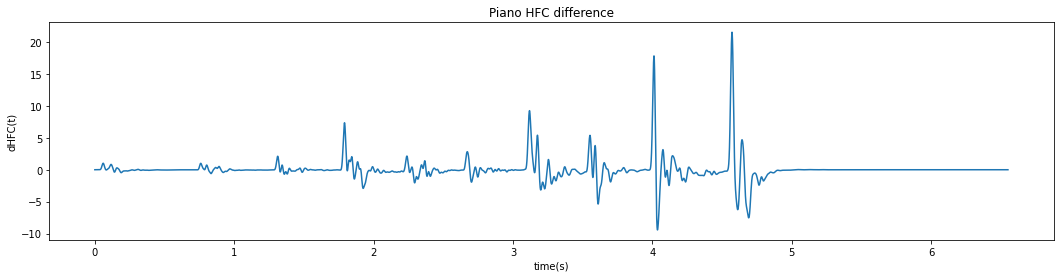

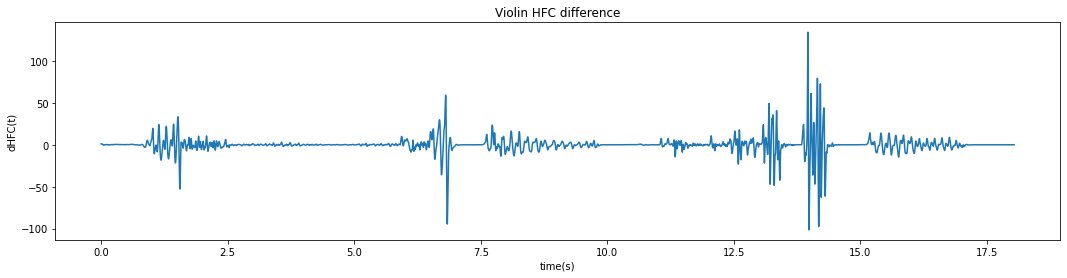

In [27]:
# Frequency Domain
M = 256
win = np.hamming(M)
zpf = 5
nfft = M*zpf

# piano
spec = librosa.core.stft(piano, n_fft=nfft, hop_length=1, win_length=M, window=win, center=True)
nframe = np.shape(spec)[1]

e = np.sum(np.power(np.abs(spec),2),axis=0)

hfc = []
fi = np.linspace(0, sr/2, num=np.shape(spec)[0])
for i in range(0,nframe):
  X = spec[:,i]
  hfc.append(np.sum(np.multiply(fi,np.power(np.abs(X),2)),axis=0)/(M/2+1))


diffhfc = np.diff(hfc)
dhfc = np.zeros(len(diffhfc)-M)
for i in range(0,len(diffhfc)-M):
  dhfc[i] = np.sum(np.multiply(diffhfc[i:i+M],window))/M

ti_dhfc = np.linspace(0, len(piano)/sr, num=len(dhfc))

plt.figure(figsize=(18, 4))
plt.plot(ti_dhfc,dhfc)
plt.title('Piano HFC difference')
plt.xlabel('time(s)')
plt.ylabel('dHFC(t)')
plt.show()

# violin
spec = librosa.core.stft(violin, n_fft=nfft, hop_length=1, win_length=M, window=win, center=True)
nframe = np.shape(spec)[1]

e = np.sum(np.power(np.abs(spec),2),axis=0)

hfc = []
fi = np.linspace(0, sr/2, num=np.shape(spec)[0])
for i in range(0,nframe):
  X = spec[:,i]
  hfc.append(np.sum(np.multiply(fi,np.power(np.abs(X),2)),axis=0)/(M/2+1))


diffhfc = np.diff(hfc)
dhfc = np.zeros(len(diffhfc)-M)
for i in range(0,len(diffhfc)-M):
  dhfc[i] = np.sum(np.multiply(diffhfc[i:i+M],window))/M

ti_dhfc = np.linspace(0, len(violin)/sr, num=len(dhfc))

plt.figure(figsize=(18, 4))
plt.plot(ti_dhfc,dhfc)
plt.title('Violin HFC difference')
plt.xlabel('time(s)')
plt.ylabel('dHFC(t)')
plt.show()

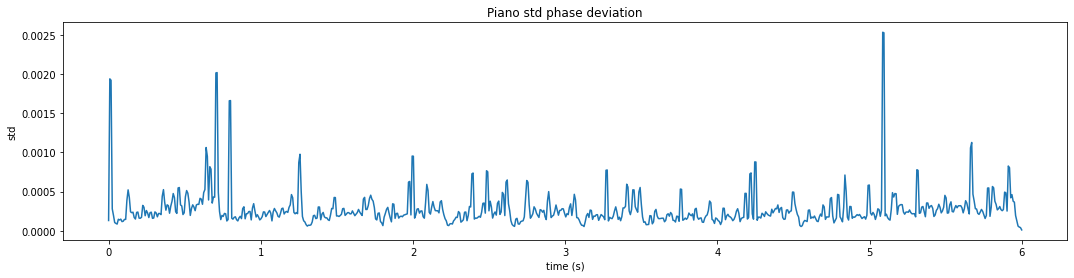

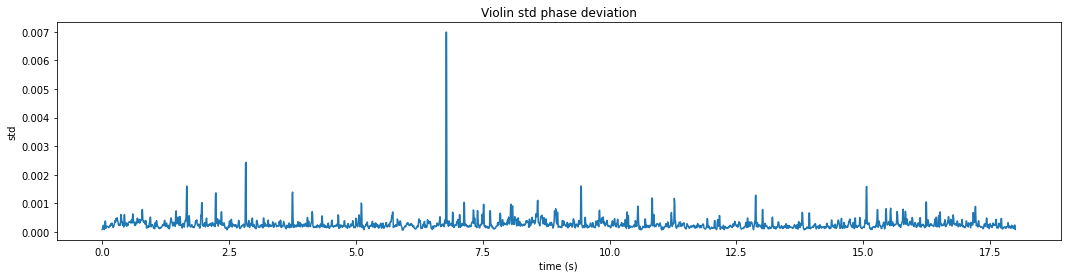

In [32]:
# Phase-based Feature
M = 1024
hopsize = int(M/16)
hopfac = int(M/hopsize)
Nfft = M
overlap = Nfft*(1-1/hopfac)
win = np.ones(Nfft)

# Piano
x = piano[0:int(sr*6)]

_,_,X = signal.stft(x,fs=sr, window=win,nperseg=M,noverlap = overlap)

k = np.arange(Nfft/2 + 1)

ifr = np.zeros(np.shape(X))
T = np.zeros(np.shape(X)[1])

for i in range(0,np.shape(X)[1]):
  Xk = X[:,i]
  Xkplus1 = np.append(Xk[1:],0.000001)
  Xkminus1 = np.append(0.00001,Xk[0:-1])

  ifr[:,i] = np.multiply(sr,np.subtract(np.divide(k,Nfft),np.imag(np.multiply(1j/Nfft,np.divide(np.subtract(Xkplus1,Xkminus1),np.add(np.subtract(np.subtract(np.multiply(Xk,2),Xkplus1),Xkminus1),2*0.000001))))))
  T[i] = i*((Nfft/hopfac)/sr)
  
dif = np.divide(np.diff(ifr),sr*2*np.pi)
pd = np.mean(np.abs(dif),axis=0)

stdev = np.zeros(len(T)-1)

for i in range(0,len(T)-1):
  stdev[i] = np.std(np.abs(dif[:,i]))

ti_stdev = np.linspace(0, len(x)/sr, num=len(stdev))

plt.figure(figsize=(18, 4))
plt.plot(ti_stdev,stdev)
plt.title('Piano std phase deviation')
plt.xlabel('time (s)')
plt.ylabel('std')
plt.show()

# Violin
x = violin[0:int(sr*18)]

_,_,X = signal.stft(x,fs=sr, window=win,nperseg=M,noverlap = overlap)

k = np.arange(Nfft/2 + 1)

ifr = np.zeros(np.shape(X))
T = np.zeros(np.shape(X)[1])

for i in range(0,np.shape(X)[1]):
  Xk = X[:,i]
  Xkplus1 = np.append(Xk[1:],0.000001)
  Xkminus1 = np.append(0.00001,Xk[0:-1])

  ifr[:,i] = np.multiply(sr,np.subtract(np.divide(k,Nfft),np.imag(np.multiply(1j/Nfft,np.divide(np.subtract(Xkplus1,Xkminus1),np.add(np.subtract(np.subtract(np.multiply(Xk,2),Xkplus1),Xkminus1),2*0.000001))))))
  T[i] = i*((Nfft/hopfac)/sr)
  
dif = np.divide(np.diff(ifr),sr*2*np.pi)
pd = np.mean(np.abs(dif),axis=0)

stdev = np.zeros(len(T)-1)

for i in range(0,len(T)-1):
  stdev[i] = np.std(np.abs(dif[:,i]))

ti_stdev = np.linspace(0, len(x)/sr, num=len(stdev))

plt.figure(figsize=(18, 4))
plt.plot(ti_stdev,stdev)
plt.title('Violin std phase deviation')
plt.xlabel('time (s)')
plt.ylabel('std')
plt.show()


---


2.   Chord Recognition Using Chromagram (40 pts)
 
 Lab3 has an algorithm that estimates a musical chord from a chroma feature.
 
*   a. Write a python function that takes as inputs an audio file name and returns a chord sequence at the frame level.

*   b. Run your chord recognition function on the audio file prelude_cmaj_short_11k.wav, and plot the chord sequence. (Please ignore 7th note. Consider all chords as triad chords)


In [ ]:
# a)
def chord_seq(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)
    
    return chord

In [ ]:
# b)
prelude = './lab3/wav/prelude_cmaj_short_11k.wav'
chord = chord_seq(prelude)
